Last Updated 08-05-2017

# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Imports" data-toc-modified-id="Imports-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports</a></div><div class="lev2 toc-item"><a href="#Plotting-data-in-1-dimension" data-toc-modified-id="Plotting-data-in-1-dimension-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Plotting data in 1 dimension</a></div><div class="lev3 toc-item"><a href="#Adding-to-Existing-Axis" data-toc-modified-id="Adding-to-Existing-Axis-021"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Adding to Existing Axis</a></div><div class="lev3 toc-item"><a href="#Controlling-the-figure-size" data-toc-modified-id="Controlling-the-figure-size-022"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>Controlling the figure size</a></div><div class="lev2 toc-item"><a href="#Plotting-data-in-2-dimensions" data-toc-modified-id="Plotting-data-in-2-dimensions-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Plotting data in 2 dimensions</a></div><div class="lev2 toc-item"><a href="#Faceting" data-toc-modified-id="Faceting-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Faceting</a></div><div class="lev3 toc-item"><a href="#Other-features" data-toc-modified-id="Other-features-041"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Other features</a></div><div class="lev2 toc-item"><a href="#Maps" data-toc-modified-id="Maps-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Maps</a></div><div class="lev3 toc-item"><a href="#GeoViews" data-toc-modified-id="GeoViews-051"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>GeoViews</a></div><div class="lev4 toc-item"><a href="#Loading-data-in-GeoViews-Dataset" data-toc-modified-id="Loading-data-in-GeoViews-Dataset-0511"><span class="toc-item-num">0.5.1.1&nbsp;&nbsp;</span>Loading data in GeoViews Dataset</a></div><div class="lev4 toc-item"><a href="#Overlaying-data-and-normalization" data-toc-modified-id="Overlaying-data-and-normalization-0512"><span class="toc-item-num">0.5.1.2&nbsp;&nbsp;</span>Overlaying data and normalization</a></div><div class="lev4 toc-item"><a href="#Conversions" data-toc-modified-id="Conversions-0513"><span class="toc-item-num">0.5.1.3&nbsp;&nbsp;</span>Conversions</a></div><div class="lev4 toc-item"><a href="#Non-geographical-views" data-toc-modified-id="Non-geographical-views-0514"><span class="toc-item-num">0.5.1.4&nbsp;&nbsp;</span>Non-geographical views</a></div><div class="lev4 toc-item"><a href="#Lower-dimensional-views" data-toc-modified-id="Lower-dimensional-views-0515"><span class="toc-item-num">0.5.1.5&nbsp;&nbsp;</span>Lower-dimensional views</a></div><div class="lev2 toc-item"><a href="#Key-Points" data-toc-modified-id="Key-Points-06"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Key Points</a></div>

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.figsize'] = (12, 15)
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

hv.notebook_extension()

In [2]:
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'

In [3]:
%time ds = xr.open_dataset('/home/abanihi/Documents/climate-data/ERM/t85.an.sfc/e4moda.an.sfc.t85.sst.1957-2002.nc')

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 15.8 ms


In [4]:
ds

<xarray.Dataset>
Dimensions:     (lat: 128, lon: 256, time: 540)
Coordinates:
  * time        (time) datetime64[ns] 1957-09-01 1957-10-01 1957-11-01 ...
  * lat         (lat) float32 -88.9277 -87.5387 -86.1415 -84.7424 -83.3426 ...
  * lon         (lon) float32 0.0 1.406 2.812 4.218 5.624 7.03 8.436 9.842 ...
Data variables:
    gw          (lat) float32 0.000449381 0.00104581 0.0016425 0.00223829 ...
    date        (time) int32 19570901 19571001 19571101 19571201 19580101 ...
    datesec     (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    yyyymmddhh  (time) int32 1957090100 1957100100 1957110100 1957120100 ...
    SST         (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    title:                     \nERA40 T85 Surface Analysis: created at NCAR
    temporal_span:             \nThe entire ERA40 archive spans 45 years: Sep...
    source_original:           \nEuropean Center for Medium-Range Weather For...
    story:                 

## Plotting data in 1 dimension

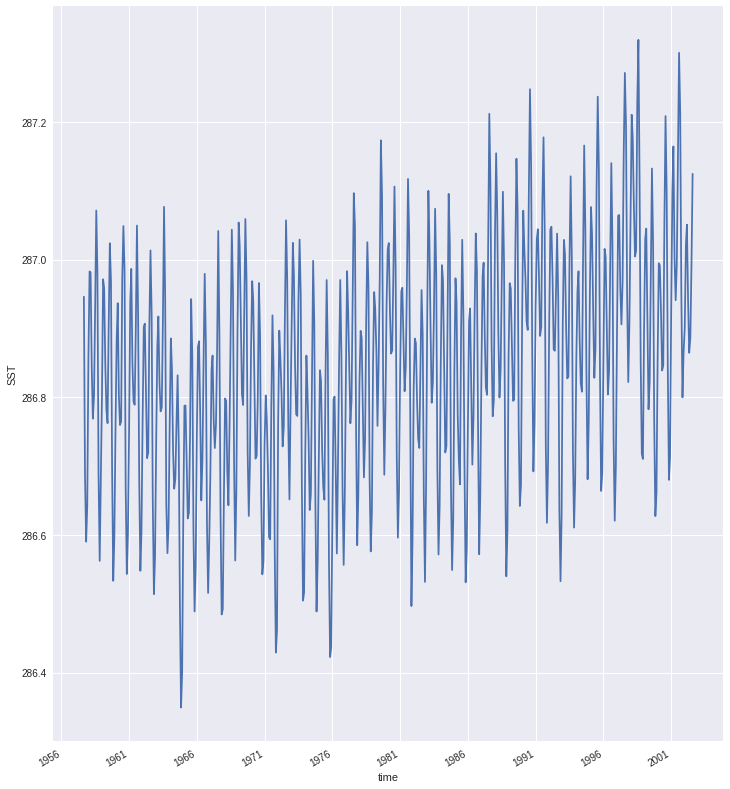

In [5]:
time_series = ds.mean(dim=['lat', 'lon']).SST
time_series.plot()

Your plots can be **customized** using syntax that is very similar to Matplotlib.

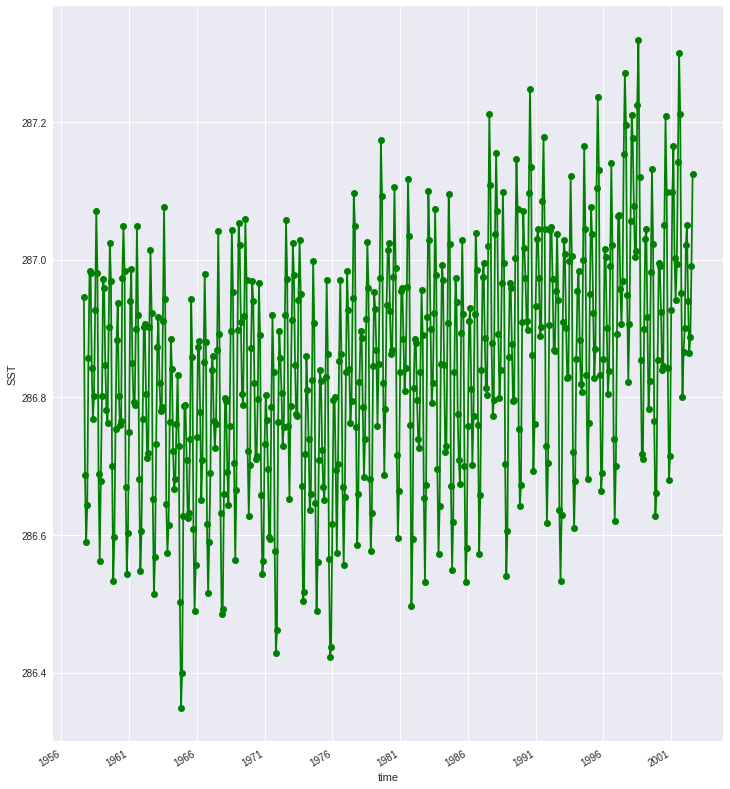

In [6]:
time_series.plot.line(color='green', marker='o')

### Adding to Existing Axis

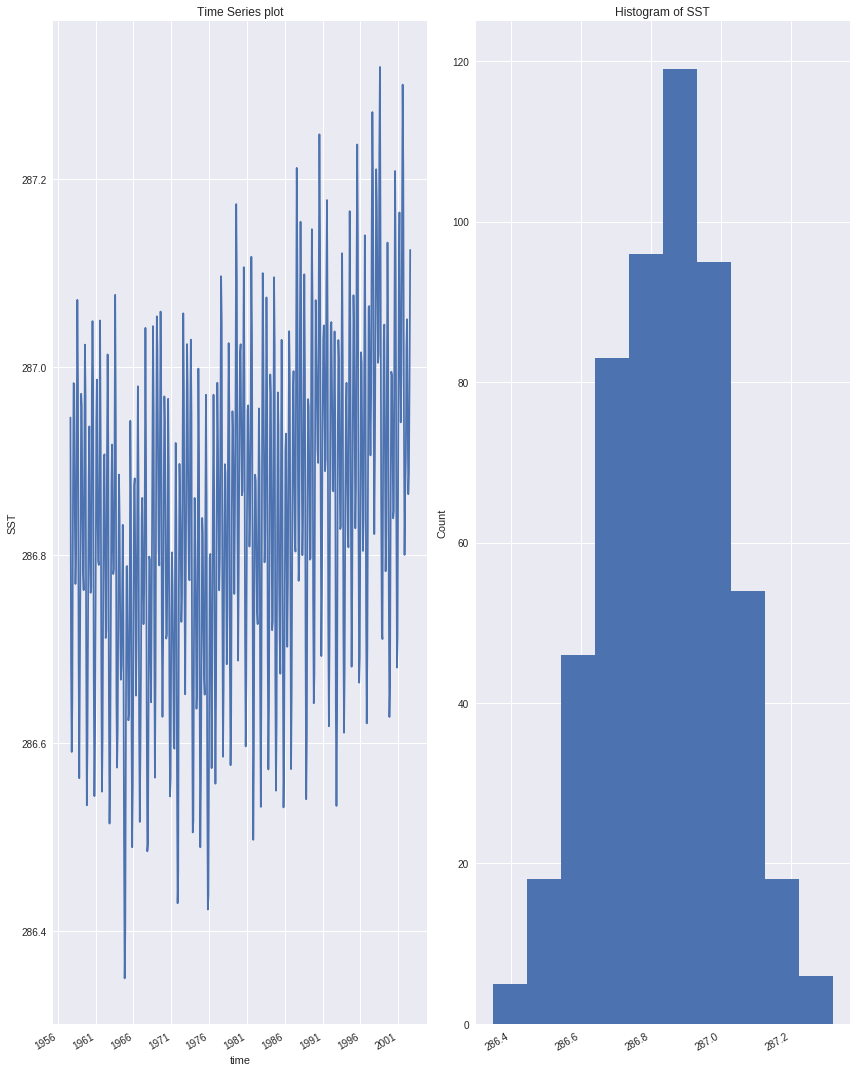

In [7]:
fig, axes = plt.subplots(ncols=2)
axes
time_series.plot(ax=axes[0])
time_series.plot.hist(ax=axes[1])
axes[0].set_title('Time Series plot')
plt.tight_layout()

### Controlling the figure size

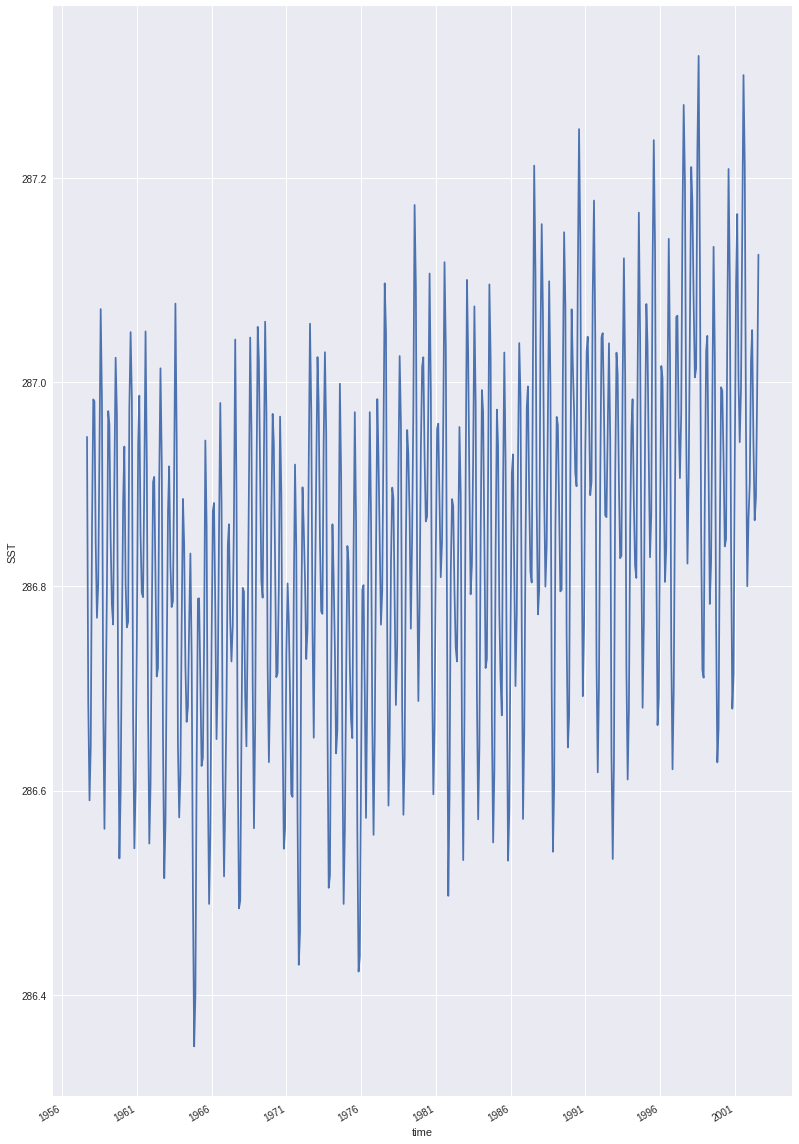

In [8]:
time_series.plot(aspect=0.7, size=16)
plt.tight_layout()

## Plotting data in 2 dimensions

- Since many xarray applications involve geospatial datasets, xarray’s plotting extends to maps in 2 dimensions. Let’s first select a 2-D subset of our data by choosing a single date and retaining all the latitude and longitude dimensions:

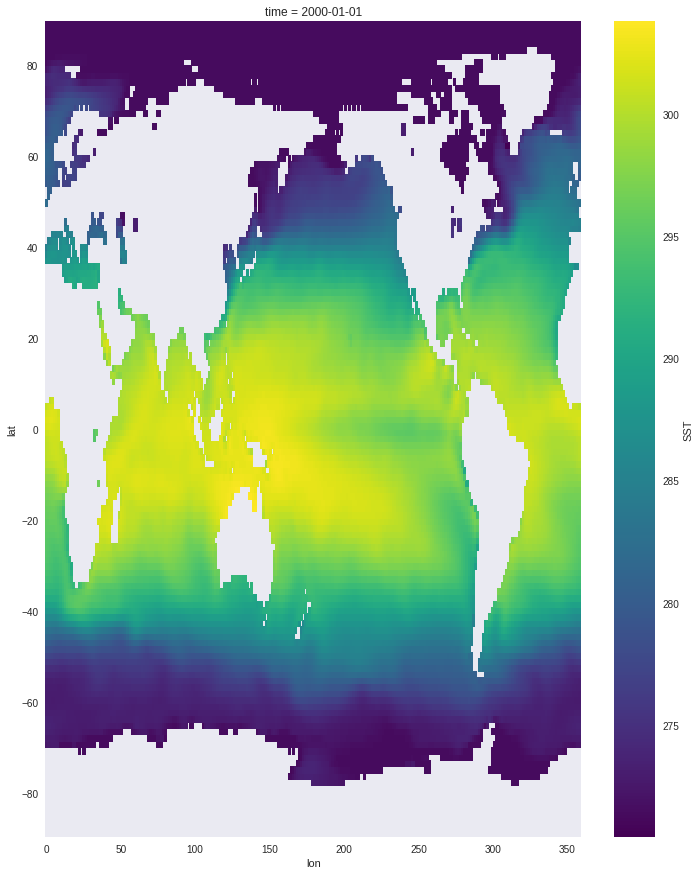

In [9]:
map_data = ds['SST'].sel(time='2000-01-01')
map_data.plot()

- Note that in the above label-based lookup, we did not specify the latitude and longitude dimensions, in which case xarray assumes we want to return all elements in those dimensions.
- Customization can occur following standard Matplotlib syntax. Note that before we use matplotlib

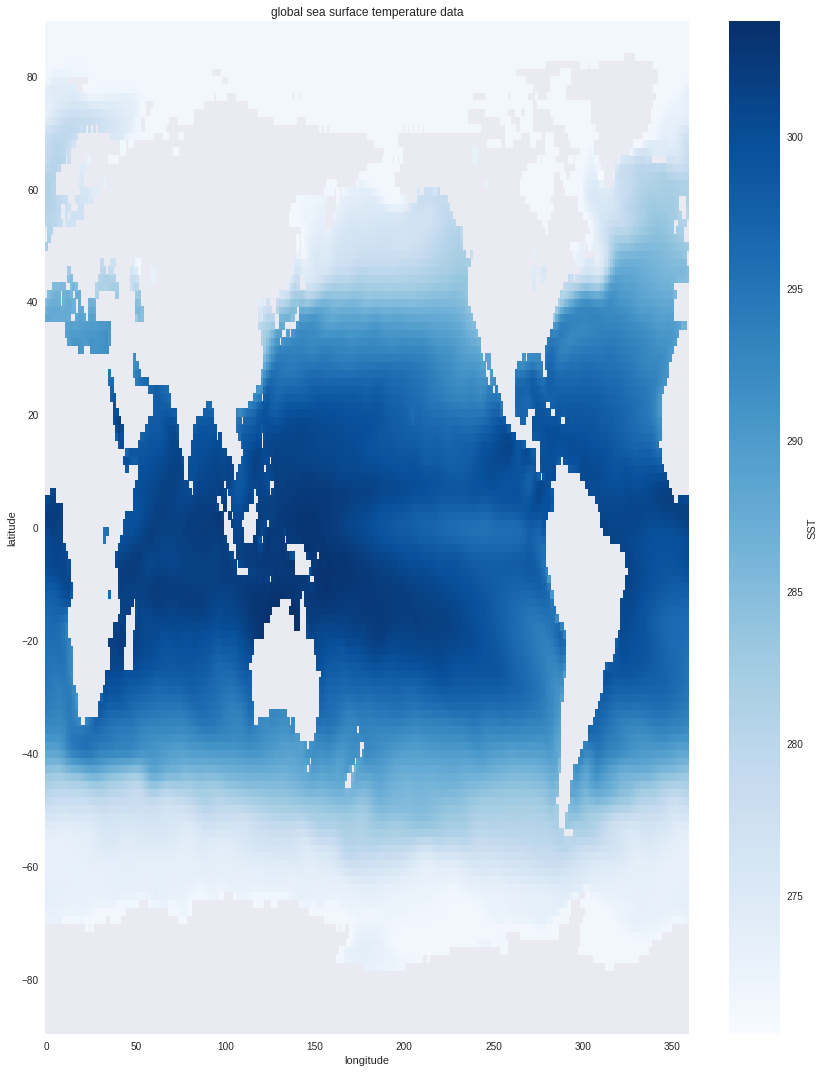

In [10]:
map_data.plot(cmap=plt.cm.Blues)
plt.title('global sea surface temperature data')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.tight_layout()

## Faceting


Faceting here refers to splitting an array along one or two dimensions and plotting each group. xarray’s basic plotting is useful for plotting two dimensional arrays. What about three or four dimensional arrays? That’s where facets become helpful.

In [11]:
time_series = ds['SST'].sel(time=slice('1957-09-01', '1959-08-01'))

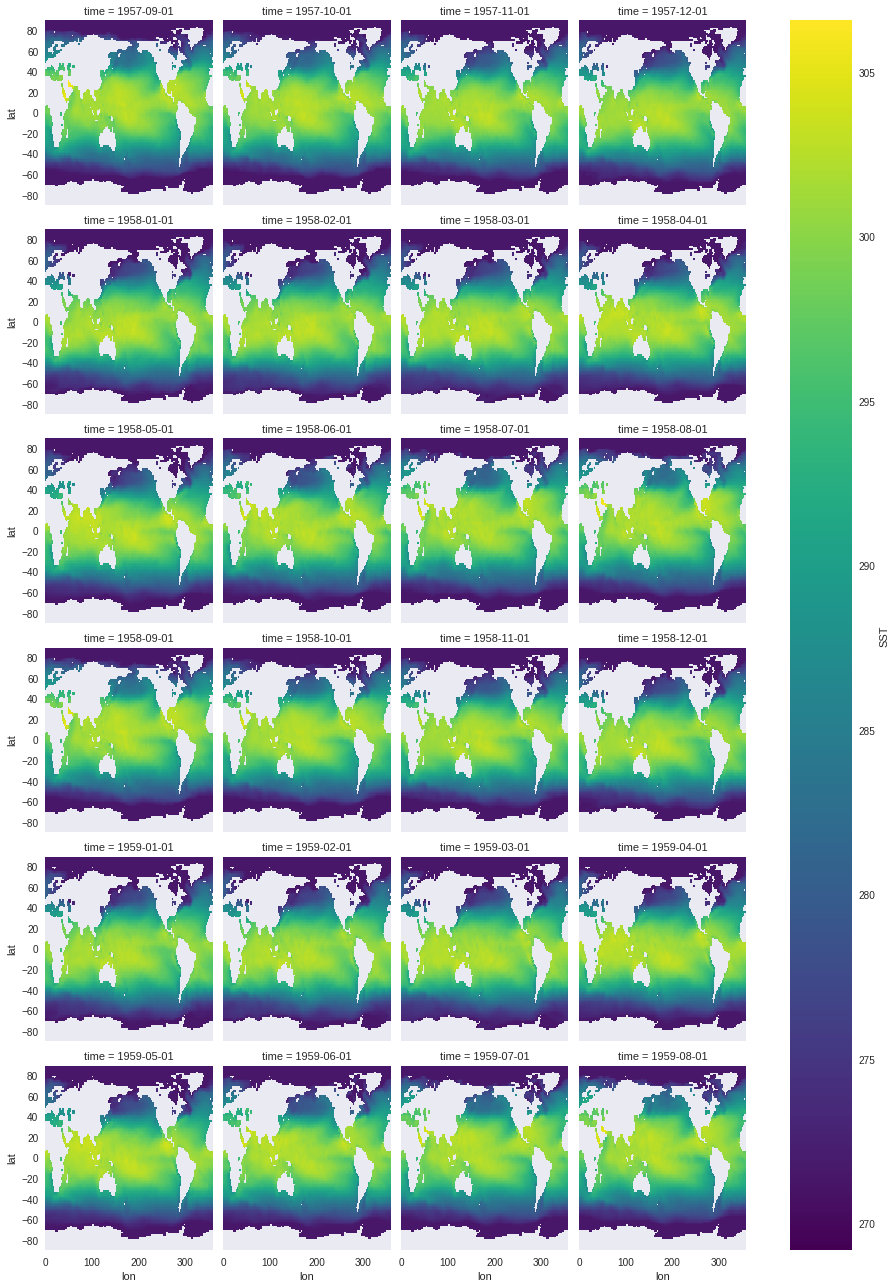

In [12]:
time_series.plot(x='lon', y='lat', col='time', col_wrap=4)

### Other features

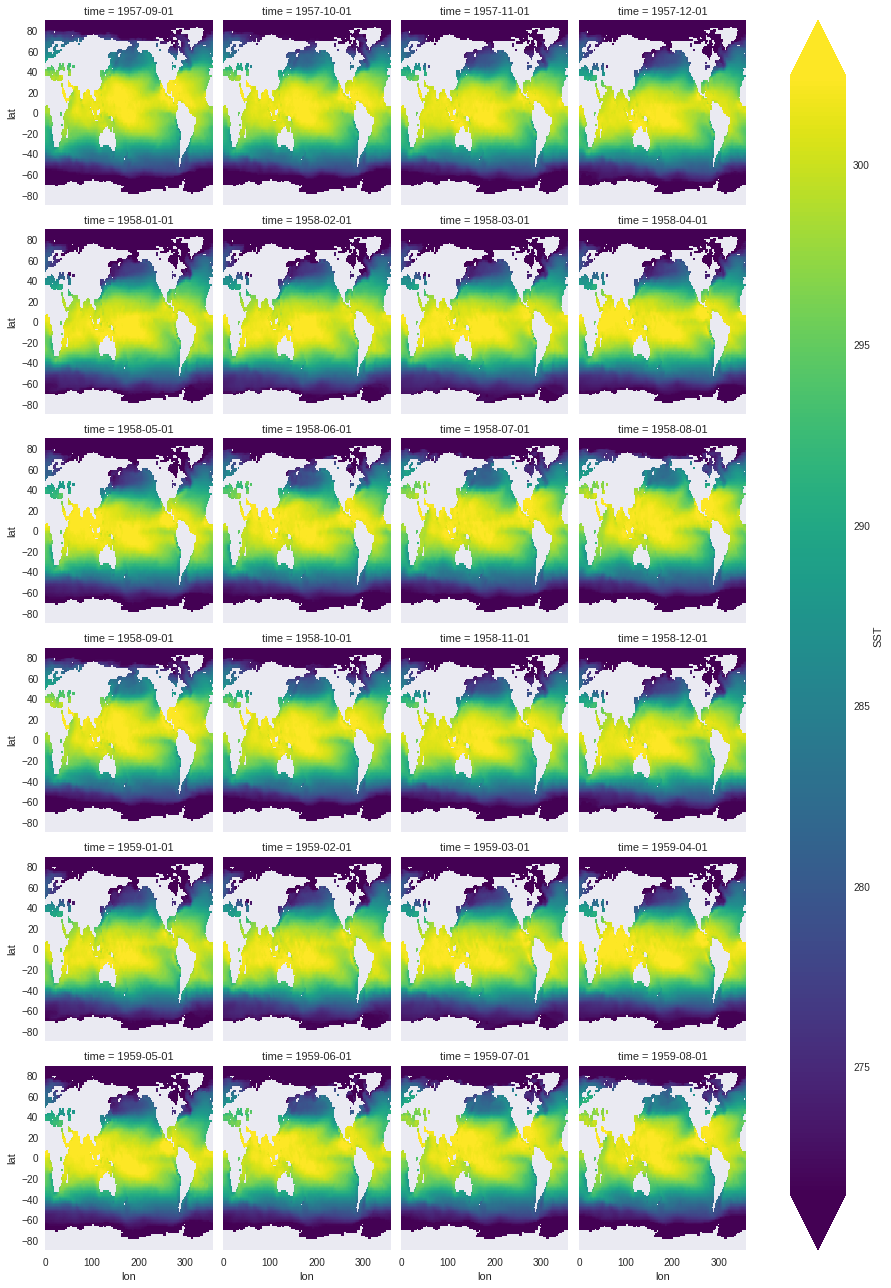

In [13]:
time_series.plot.pcolormesh(x='lon', y='lat', col='time', col_wrap=4,
                           robust=True, cmap='viridis')

## Maps

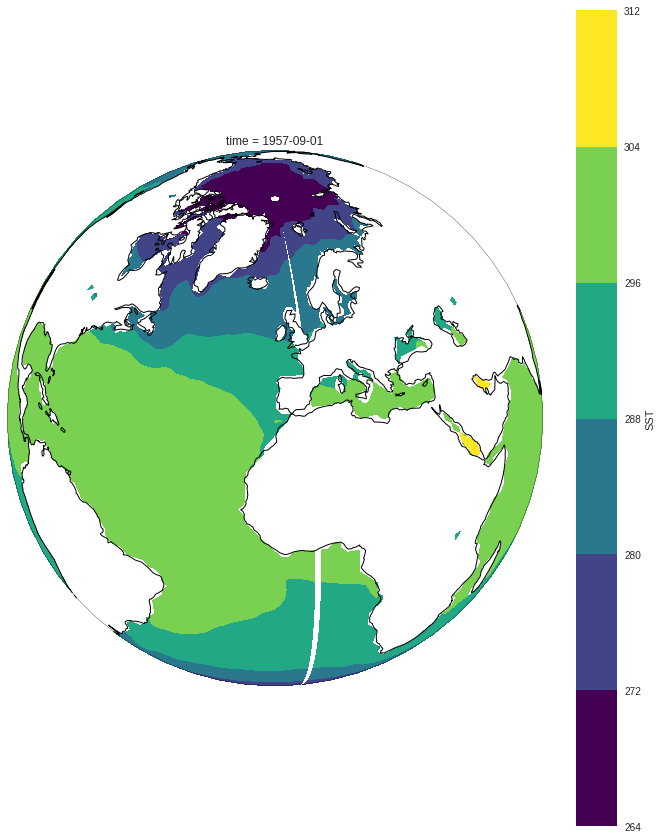

In [14]:
ax = plt.axes(projection=crs.Orthographic(-10, 35))
time_series.isel(time=0).plot.contourf(ax=ax, transform=crs.PlateCarree());
ax.set_global(); ax.coastlines();


- When faceting on maps, the projection can be transferred to the ```plot``` function using the ```subplot_kws``` keyword. The axes for the subplots created by faceting are accessible in the object returned by ```plot```:

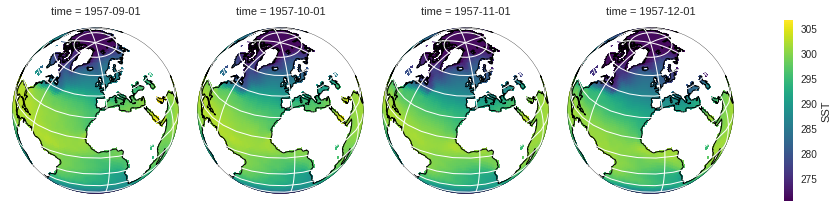

In [15]:
p = time_series.isel(time=slice(0, 4)).plot(transform=crs.PlateCarree(),
                                      col='time', 
                                      subplot_kws={'projection': crs.Orthographic(-10, 35)})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    


### GeoViews

In [16]:
%opts Image {+framewise} [colorbar=True] Curve [xrotation=60]
%output max_frames=1000 

#### Loading data in GeoViews Dataset

- wrapping the data in a GeoViews Dataset Element and declaring the key dimensions ( kdims ) and value dimensions ( vdims 

In [17]:
kdims = ['time', 'lat', 'lon']
vdims = ['SST']

xr_dataset = gv.Dataset(time_series, kdims=kdims, vdims=vdims,
                       crs=crs.PlateCarree())

To visualize the datasets, in a single line of code we can specify that we want to view it as a collection of Images indexed by longitude and latitude (a HoloViews ```HoloMap``` of ```gv.Image``` elements):

:HoloMap   [time]
   :Image   [lon,lat]   (SST)
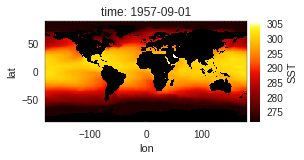
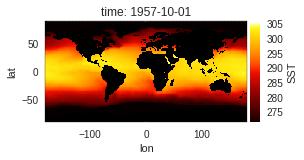
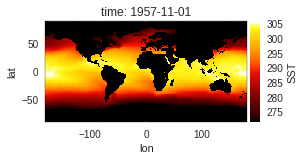
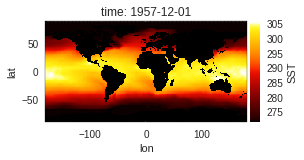
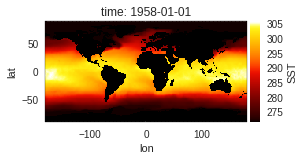
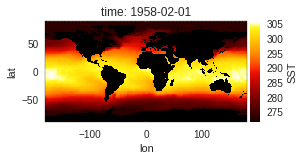
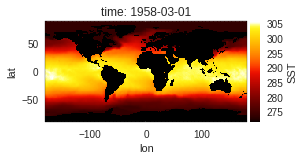
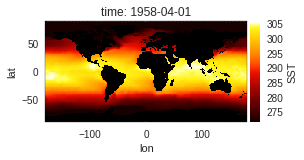
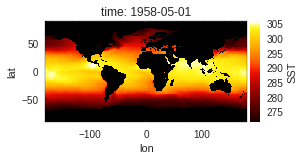
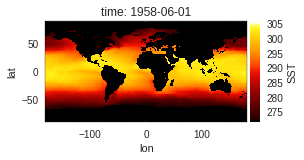
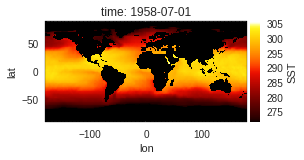
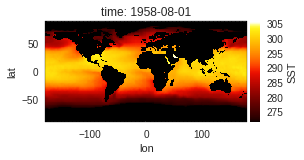
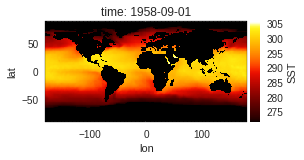
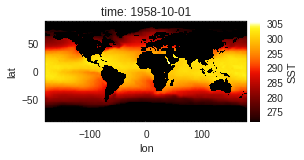
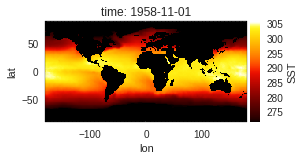
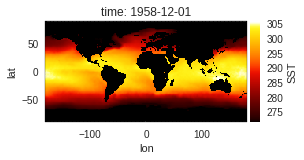
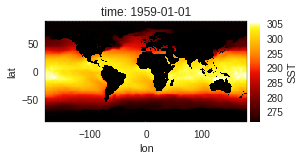
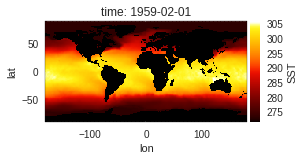
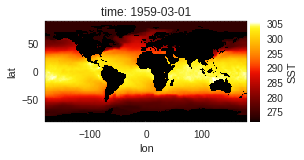
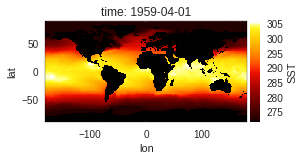
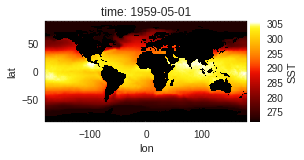
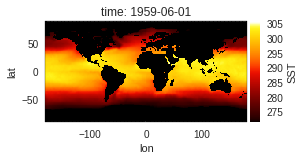
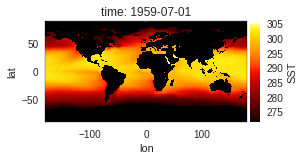
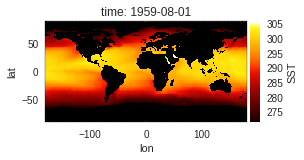

In [18]:
xr_dataset.to(gv.Image, ['lon', 'lat'])

:Layout
   .HoloMap.I :HoloMap   [time]
      :Overlay
         .Image.I  :Image   [lon,lat]   (SST)
         .Points.I :Points   [Longitude,Latitude]
   .Curve.I   :Curve   [time]   (SST)
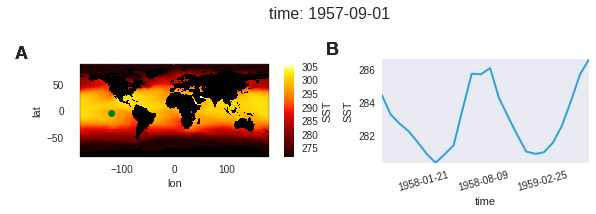
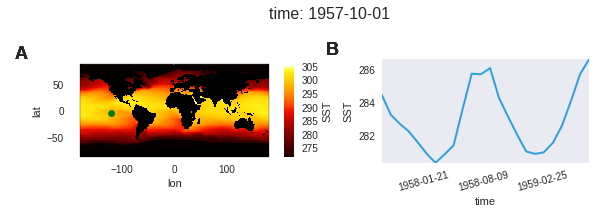
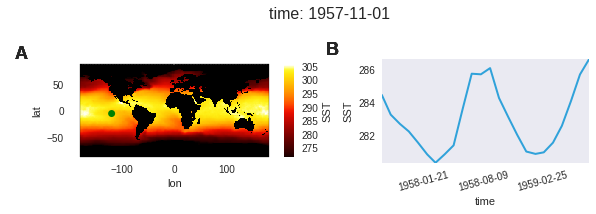
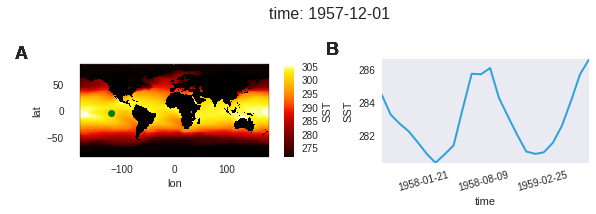
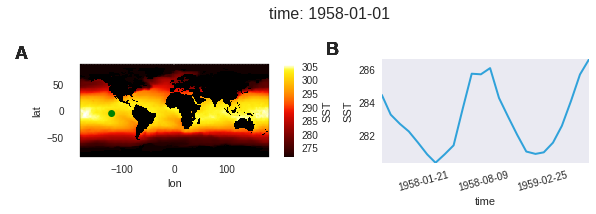
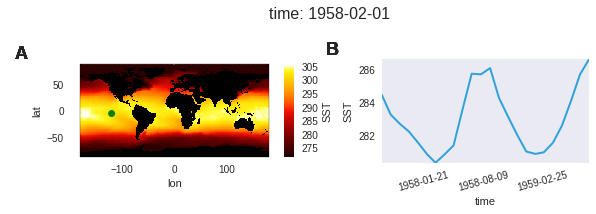
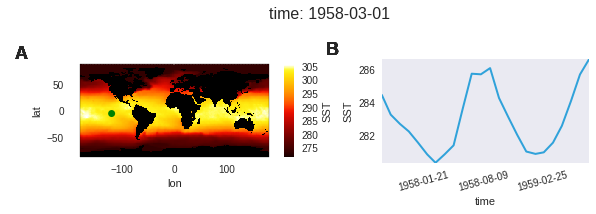
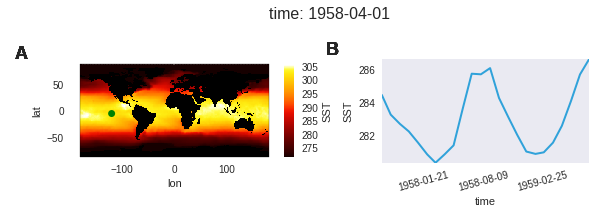
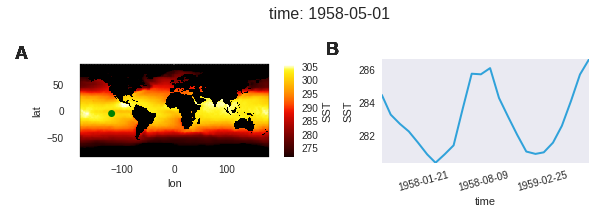
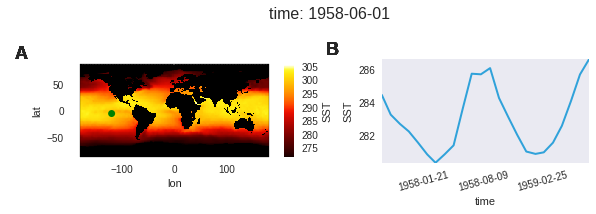
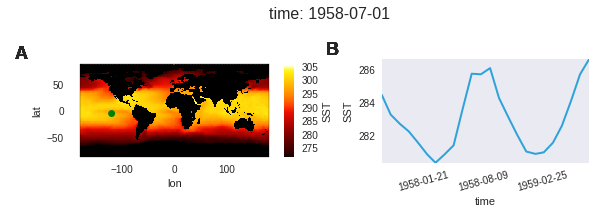
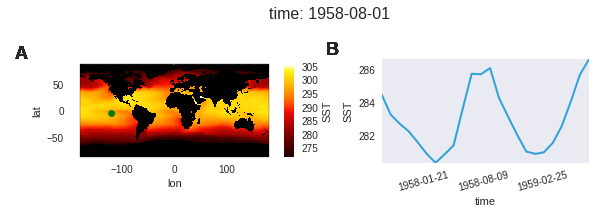
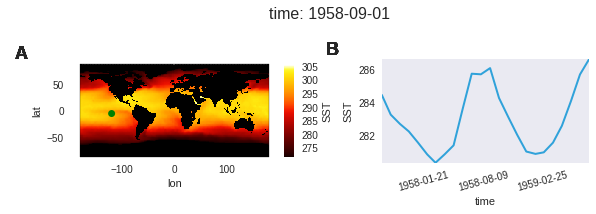
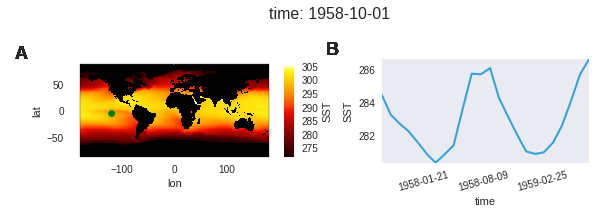
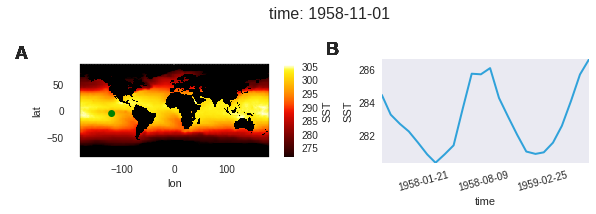
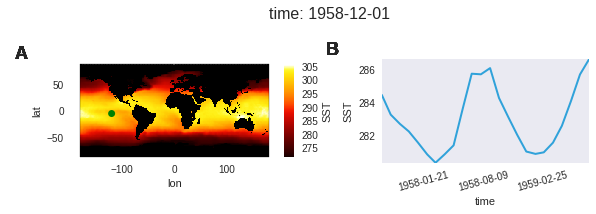
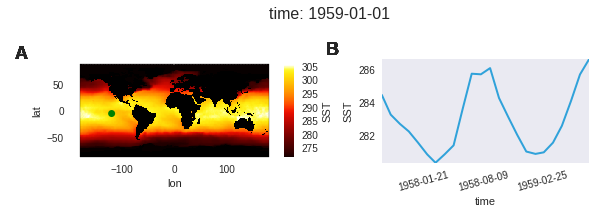
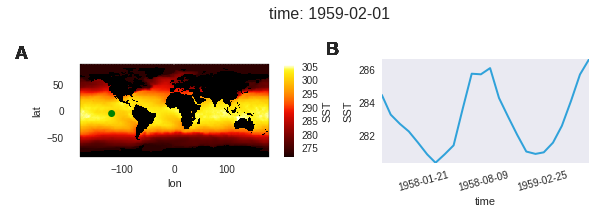
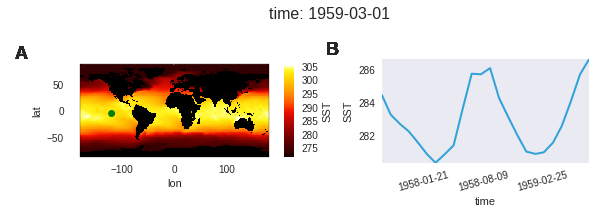
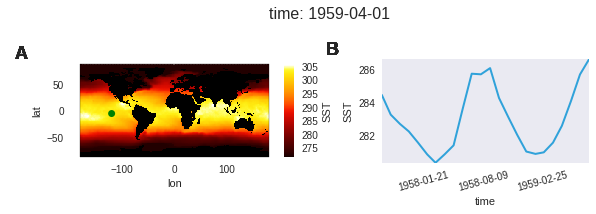
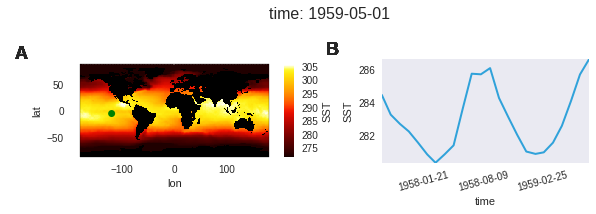
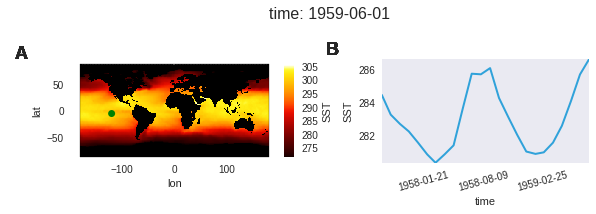
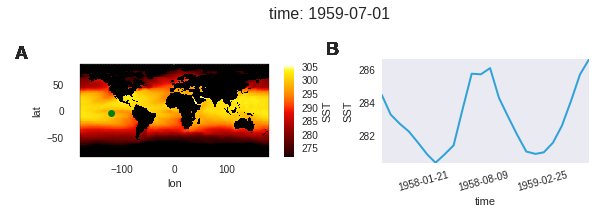
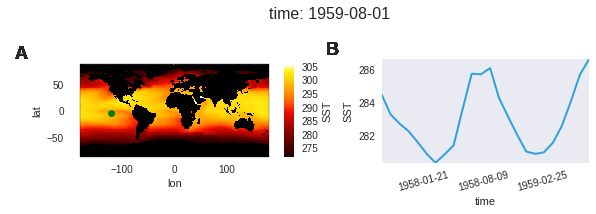

In [19]:
%%opts Curve [aspect=2 xticks=4 xrotation=15] Points (color='green')
temp_curve = hv.Curve(xr_dataset.select(lon=slice(0, 1), lat=slice(60, 61)), kdims=['time'])
temp_map = xr_dataset.to(gv.Image,['lon', 'lat']) * gv.Points([(240,-5)], crs=crs.PlateCarree())
temp_map + temp_curve

#### Overlaying data and normalization

:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (SST)
      .Coastline.I :Feature   [Longitude,Latitude]
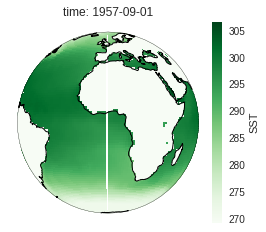
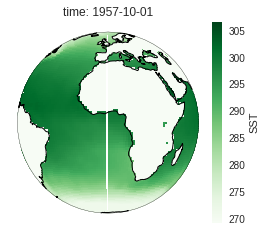
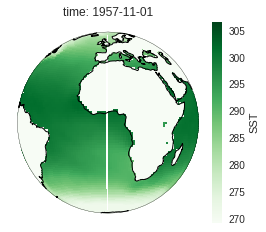
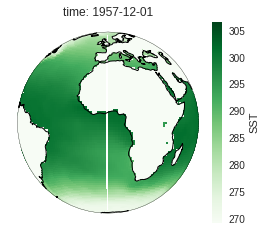
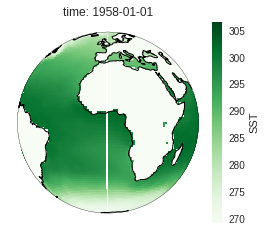
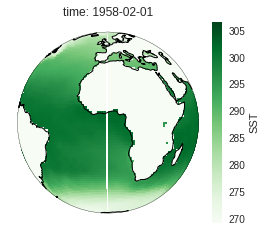
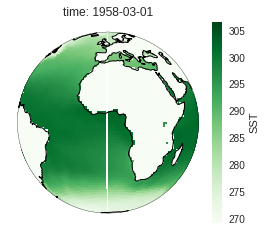
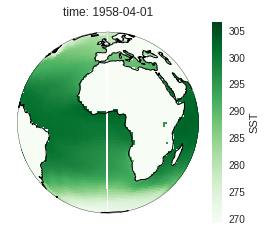
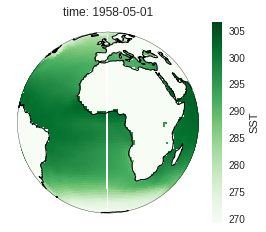
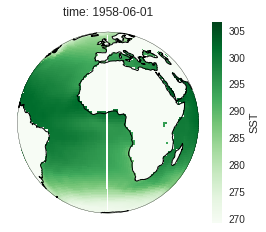
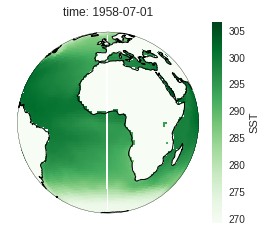
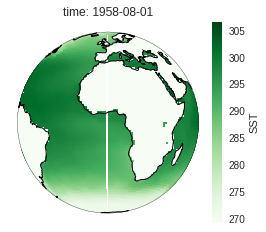
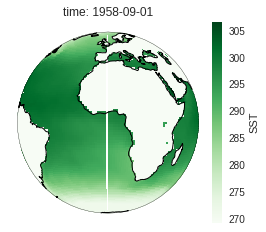
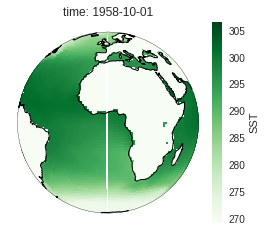
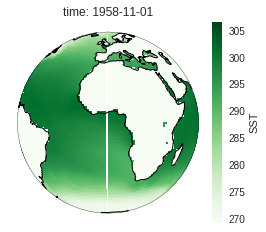
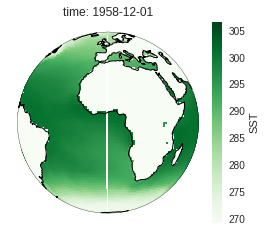
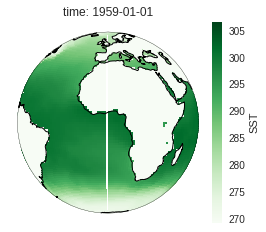
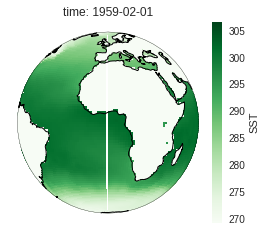
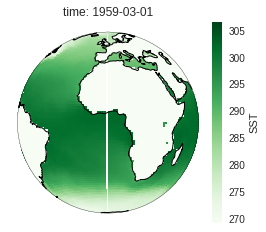
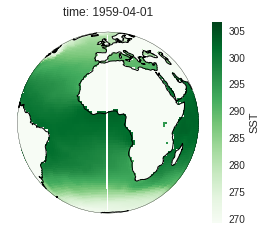
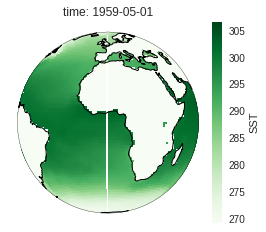
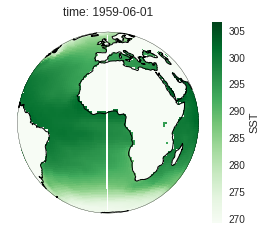
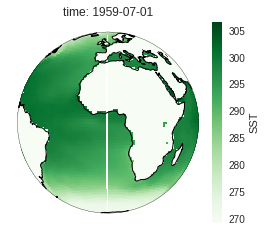
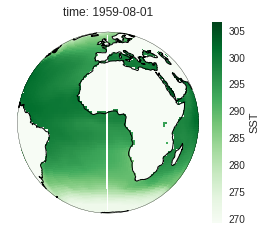

In [20]:
%%opts Image [projection=crs.Geostationary()] (cmap='Greens') Overlay [xaxis=None yaxis=None]
xr_dataset.to.image(['lon', 'lat']) * gf.coastline

- Notice that every frame individually uses the full dynamic range of the Greens color map. This is because normalization is set to ```+framewise``` which means every frame is normalized independently. This sort of normalization can be computed on an as-needed basis, using whatever values are found in the current data being shown in a given frame, but it won't let you see how different frames compare to each other.
- To control normalization, we need to decide on the normalization limits. Let's see the maximum temperature in the cube, and use it to set a normalization range by using the redim method:

306.573486328125


:HoloMap   [time]
   :Overlay
      .Image.I     :Image   [lon,lat]   (SST)
      .Coastline.I :Feature   [Longitude,Latitude]
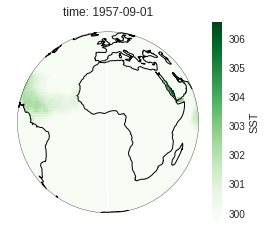
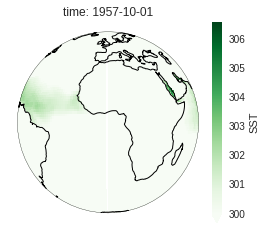
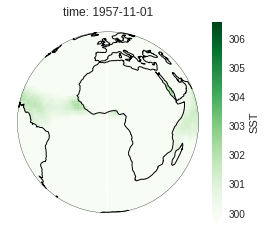
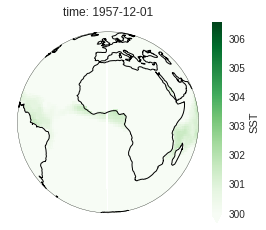
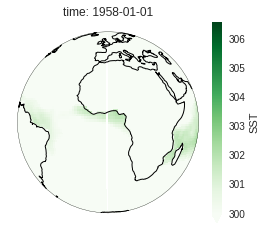
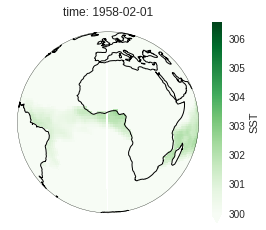
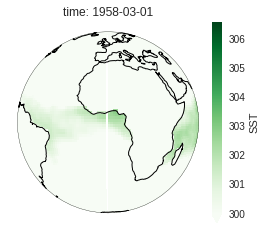
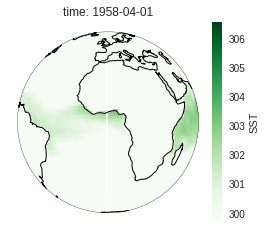
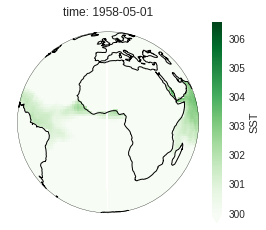
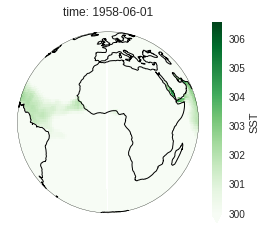
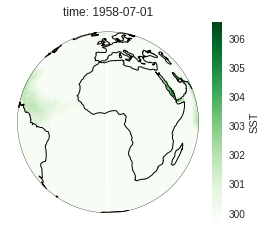
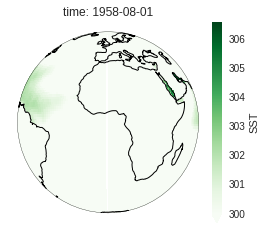
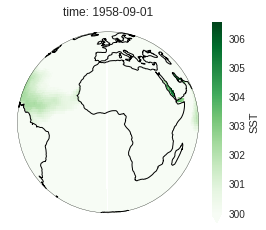
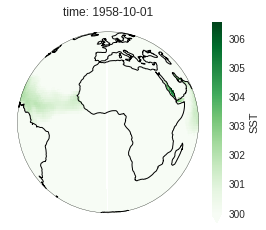
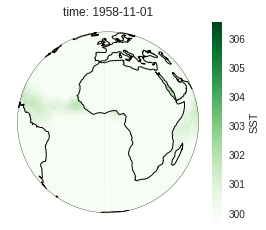
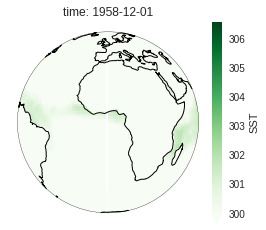
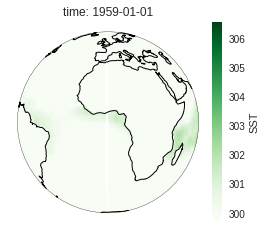
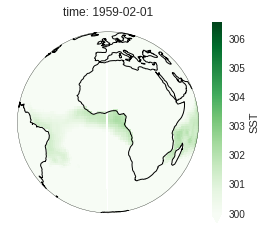
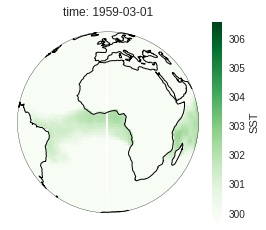
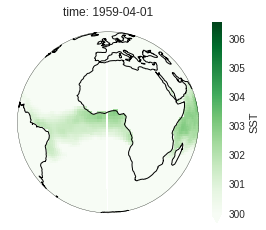
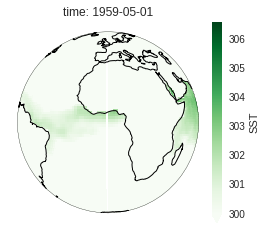
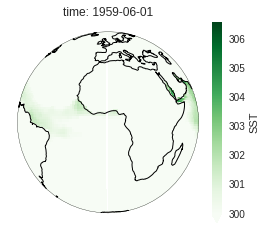
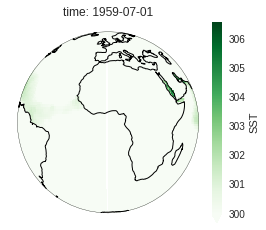
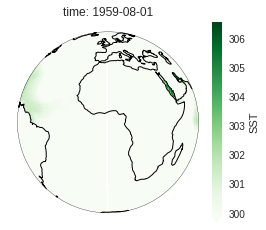

In [21]:
%%opts Image [projection=crs.Geostationary()] (cmap='Greens') Overlay [xaxis=None yaxis=None]
max_surface_temp = xr_dataset.range('SST')[1]
print(max_surface_temp)
xr_dataset.redim(SST=dict(range=(300, max_surface_temp))).to(gv.Image,['lon', 'lat']) \
  * gf.coastline


:HoloMap   [time]
   :Overlay
      .FilledContours.I :FilledContours   [lon,lat]   (SST)
      .Coastline.I      :Feature   [Longitude,Latitude]
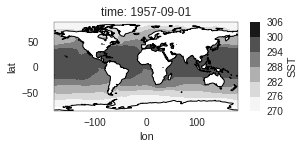
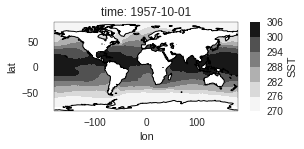
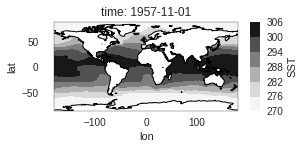
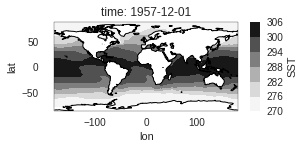
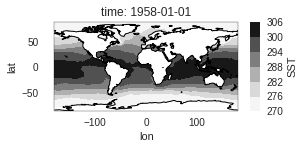
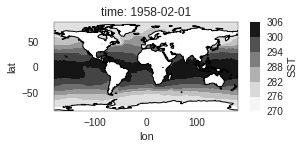
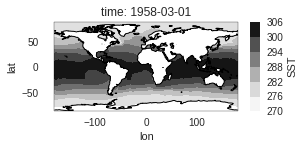
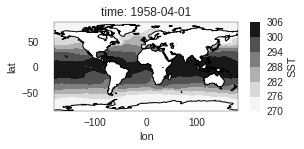
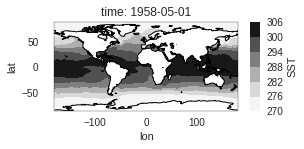
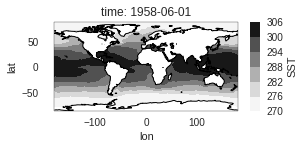
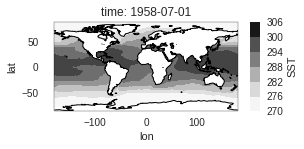
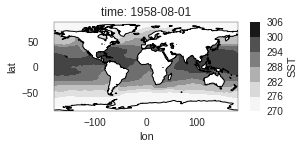
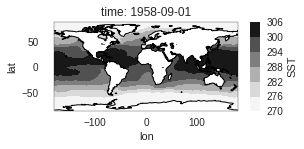
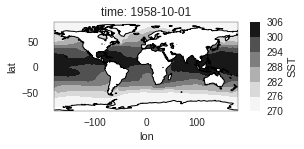
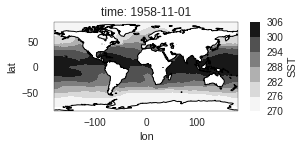
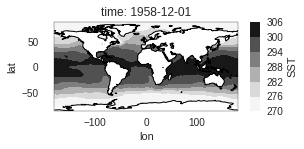
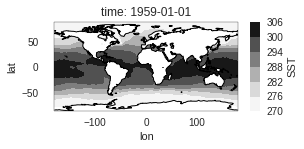
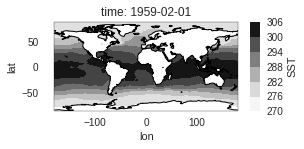
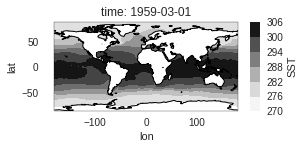
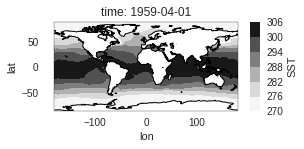
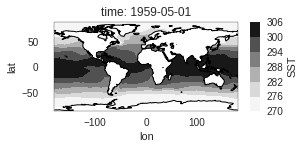
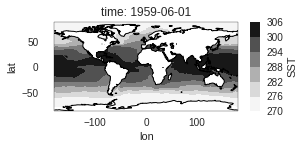
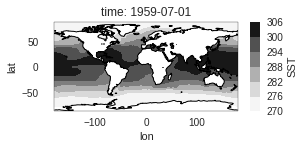
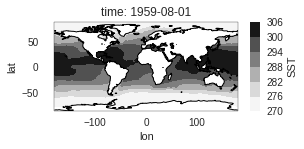

In [22]:
xr_dataset.to(gv.FilledContours,['lon', 'lat']) * gf.coastline

#### Conversions

In [23]:
dset = xr.open_dataset('/home/abanihi/Documents/climate-data/CMIP/CMIP5/NCAR/CCSM4/decadal2006/mon/Amon/r9i2p1/ua_Amon_CCSM4_decadal2006_r9i2p1_200601-203512.nc')

In [24]:
dset = dset.sel(time=slice('2006-01-16T12:00:00', '2007-01-16T12:00:00'))

In [25]:
dset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 288, plev: 17, time: 13)
Coordinates:
  * time       (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 6e+04 5e+04 4e+04 ...
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 0.0 31.0 31.0 59.0 59.0 90.0 90.0 120.0 ...
    lat_bnds   (lat, bnds) float64 -90.0 -89.53 -89.53 -88.59 -88.59 -87.64 ...
    lon_bnds   (lon, bnds) float64 -0.625 0.625 0.625 1.875 1.875 3.125 ...
    ua         (time, plev, lat, lon) float64 nan nan nan nan nan nan nan ...
Attributes:
    institution:                  NCAR (National Center for Atmospheric Resea...
    institute_id:                 NCAR
    experiment_id:                decadal2006
    source:                       CCSM4
    mo

In [26]:
kdims = ['time', 'plev', 'lat', 'lon']
vdims = ['ua']

In [27]:
dataset = gv.Dataset(dset, kdims=kdims, vdims=vdims, crs=crs.PlateCarree())
dataset

:Dataset   [time,plev,lat,lon]   (ua)

In [28]:
geo_dims = ['lon', 'lat']

:Layout
   .HoloMap.I   :HoloMap   [time,plev]
      :Overlay
         .FilledContours.I :FilledContours   [lon,lat]   (ua)
         .Coastline.I      :Feature   [Longitude,Latitude]
   .HoloMap.II  :HoloMap   [time,plev]
      :Overlay
         .LineContours.I :LineContours   [lon,lat]   (ua)
         .Coastline.I    :Feature   [Longitude,Latitude]
   .HoloMap.III :HoloMap   [time,plev]
      :Overlay
         .Points.I    :Points   [lon,lat]   (ua)
         .Coastline.I :Feature   [Longitude,Latitude]
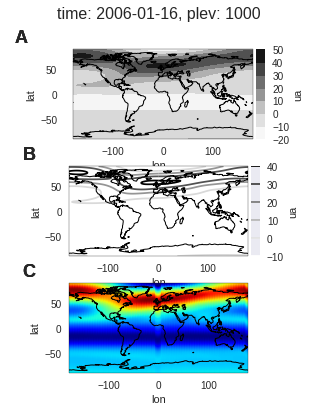
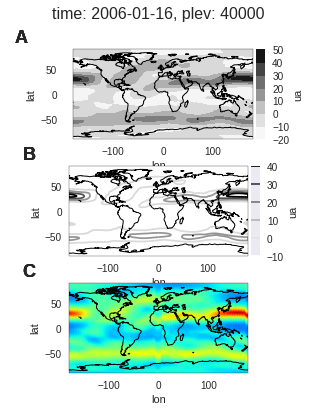
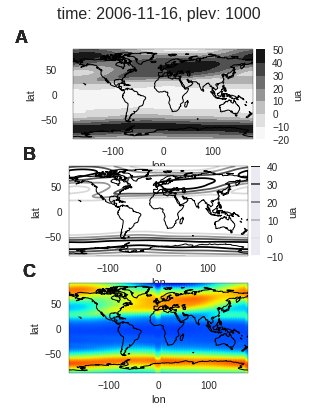
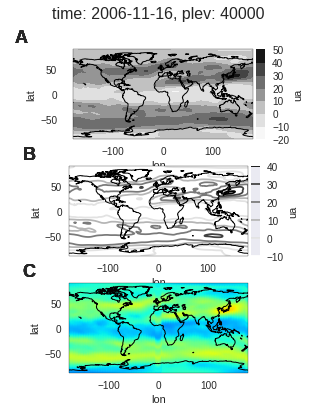

In [29]:
%%opts Points [color_index=2 size_index=None] (cmap='jet')
hv.Layout([dataset.to(el, geo_dims)[::10, ::10] * gf.coastline
           for el in [gv.FilledContours, gv.LineContours, gv.Points]]).cols(1)

#### Non-geographical views

:DynamicMap   [lat,lon]
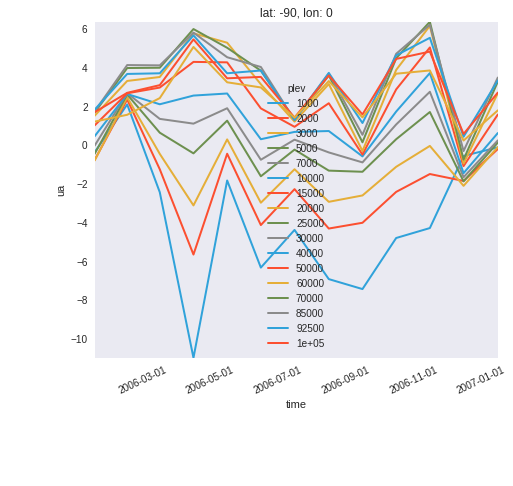

In [30]:
%%opts Curve [xrotation=25] NdOverlay [fig_size=200 aspect=1.2]
dataset.to(hv.Curve, 'time', dynamic=True).overlay('plev')

:DynamicMap   [lat,lon]
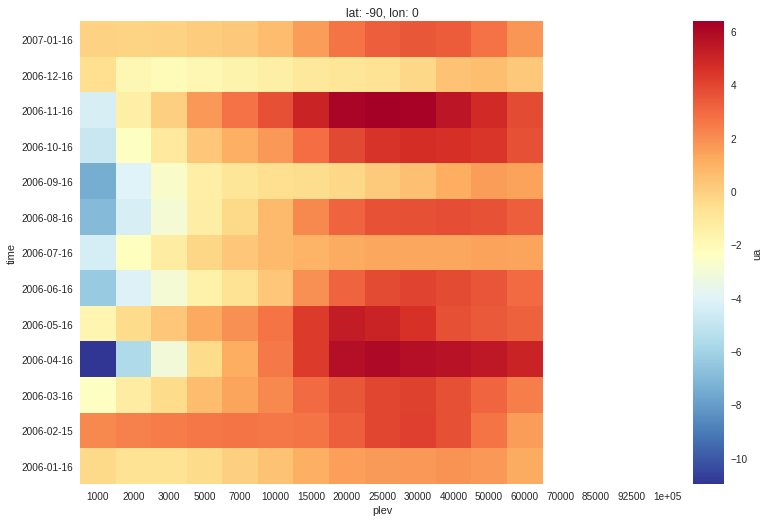

In [31]:
%%opts HeatMap [show_values=False colorbar=True fig_size=300] 
dataset.to(hv.HeatMap, ['plev', 'time'], dynamic=True)

#### Lower-dimensional views

:Layout
   .BoxWhisker.I  :BoxWhisker   [plev]   (ua)
   .BoxWhisker.II :BoxWhisker   [time]   (ua)
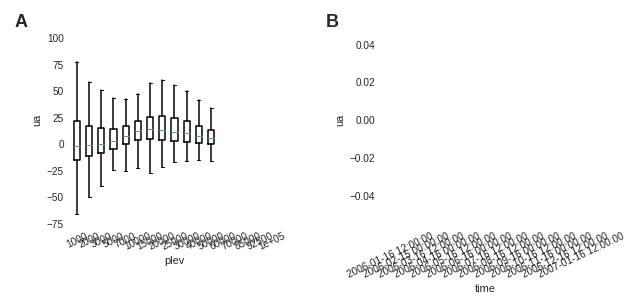

In [32]:
%%opts BoxWhisker [xrotation=25 bgcolor='w']
hv.Layout([dataset.to.box(d, None, []) for d in ['plev','time']])

In [33]:
%opts GridSpace [shared_xaxis=True] 
%opts Distribution [bgcolor='w' show_grid=False xticks=[220, 300]]
try:
    import seaborn
    grid = dataset.to.distribution(groupby=['plev', 'time']).grid()
except:
    grid = None
grid

:GridSpace   [plev,time]
   :Distribution   (ua)

:NdOverlay   [plev]
   :Curve   [time]   (ua)
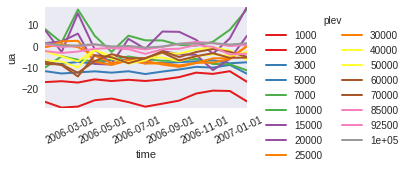

In [34]:
%opts NdOverlay [xrotation=25 aspect=2  legend_position='right' legend_cols=2] Curve (color=Palette('Set1'))
dataset.select(lat=slice(0,1), lon=slice(0,1)).to(hv.Curve, ['time']).reindex().overlay()

## Key Points

- xarray has plotting functinality that is a thin wrapper around the Matplotlib library
- xarray uses syntax and function names from Matplotlib whenever possible